In [16]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("../data/train_cat_or_dog.csv")
df.head()

,Unnamed: 0,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity,cat,dog
0,0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63,0,1
1,1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42,0,0
2,2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28,0,1
3,3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15,0,1
4,4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72,0,1


In [18]:
image_dimensions = df.Id.map(lambda t: cv2.imread("../data/train/" + t + ".jpg").shape)

In [19]:
image_dimensions.head()

0     (720, 405, 3)
1    (774, 1032, 3)
2     (960, 720, 3)
3     (720, 405, 3)
4     (960, 540, 3)
Name: Id, dtype: object

In [40]:
image_height = image_dimensions.map(lambda t: t[0])
image_width = image_dimensions.map(lambda y: y[1])
image_ratio = image_height / image_width

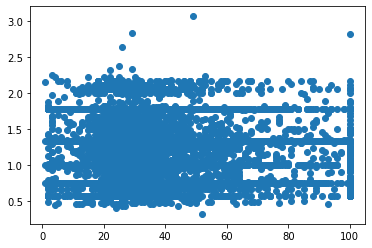

In [41]:
plt.scatter(df.Pawpularity, image_ratio)

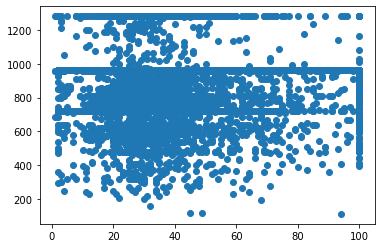

In [42]:
plt.scatter(df.Pawpularity, image_height)

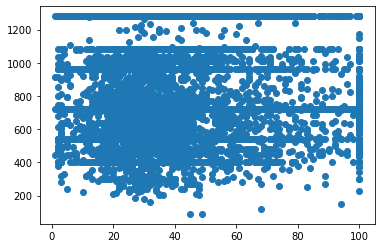

In [43]:
plt.scatter(df.Pawpularity, image_width)

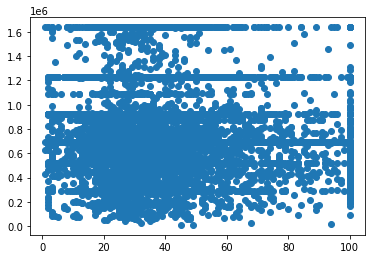

In [44]:
plt.scatter(df.Pawpularity, image_width * image_height)

In [45]:
df['image_height'] = image_height
df['image_width'] = image_width

In [51]:
np.cov(df[['min_image_ratio', 'Pawpularity']], rowvar=False)

array([[1.57300864e-02, 2.39037320e-02],
       [2.39037320e-02, 4.24030057e+02]])

In [48]:
df['min_image_ratio'] = df.apply(lambda t: (t.image_width / t.image_height) if (t.image_width < t.image_height) else (t.image_height / t.image_width), axis=1)

In [49]:
df.to_csv("../data/train_cat_or_dog.csv")


In [50]:
df.min_image_ratio

0       0.562500
1       0.750000
2       0.750000
3       0.562500
4       0.562500
          ...   
9907    0.818750
9908    0.750000
9909    0.776786
9910    0.750000
9911    0.562500
Name: min_image_ratio, Length: 9912, dtype: float64